# Random forest

## Create and train the model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset for training (with labels)
df = pd.read_csv('../pre_processing_and_viz/df_train.csv')
df

,ID,Age,Gender,MMSE,Site,label,label_id,site_id,Delta-1:4,Theta-4:8,Alpha-8:13,Beta-13:30,Gamma-30:40,gender_id
0,hokuto_dementia1,60,M,13,A,dementia,2,0,1.527738e+03,1.400718e+03,1.223784e+03,3.281070e+03,1.531131e+03,1
1,hokuto_dementia2,64,M,17,B,dementia,2,1,0.000000e+00,1.470078e+06,0.000000e+00,2.326050e+06,1.262857e+06,1
2,hokuto_dementia3,69,F,9,A,dementia,2,0,1.278396e+03,1.214818e+03,1.133075e+03,3.814643e+03,1.928315e+03,0
3,hokuto_dementia4,70,M,22,B,dementia,2,1,0.000000e+00,3.975737e+05,0.000000e+00,6.295413e+05,3.441654e+05,1
4,hokuto_dementia5,73,M,18,A,dementia,2,0,9.715404e+03,8.743269e+03,7.358837e+03,1.555337e+04,3.254478e+03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,hokuto_control96,80,M,27,B,control,0,1,0.000000e+00,3.654249e+04,0.000000e+00,5.970315e+04,3.707580e+04,1
140,hokuto_control97,81,M,28,B,control,0,1,0.000000e+00,5.084338e+05,0.000000e+00,8.046457e+05,4.396953e+05,1
141,hokuto_control98,81,M,27,A,control,0,0,1.813328e+06,1.743510e+06,1.624769e+06,4.545834e+06,1.305148e+06,1
142,hokuto_control99,85,M,28,B,control,0,1,0.000000e+00,1.776107e+05,0.000000e+00,2.819723e+05,1.563449e+05,1


In [3]:

# drop mmse because this feature is not given in the df_test. Drop Site because its only implies a sample freq different which is already taken into account for the features extraction


features = df.drop(['ID', 'label', 'label_id', 'Site', 'Gender', 'MMSE'], axis=1)

features.head()

features.dtypes


Age              int64
site_id          int64
Delta-1:4      float64
Theta-4:8      float64
Alpha-8:13     float64
Beta-13:30     float64
Gamma-30:40    float64
gender_id        int64
dtype: object

Model accuracy: 0.7241379310344828


Text(50.722222222222214, 0.5, 'Actual')

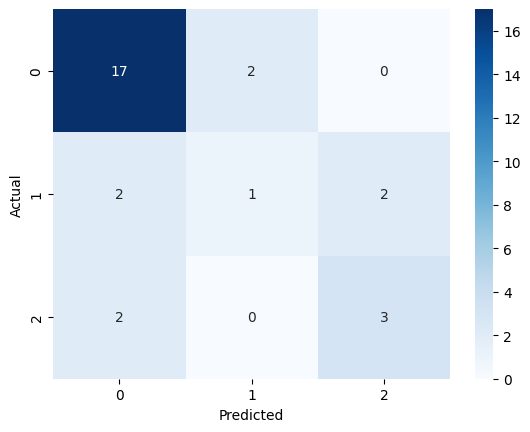

In [11]:
labels = df['label_id']


# Initialize a scaler, and fit it to the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels, test_size=0.2)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=20)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Use the trained model to predict the test data 

In [5]:
df_test = pd.read_csv('../pre_processing_and_viz/df_test.csv')
df_test.head()



,ID,Age,Gender,Site,gender_id,site_id,label,label_id,Delta-1:4,Theta-4:8,Alpha-8:13,Beta-13:30,Gamma-30:40
0,hokuto_test1,64,M,A,1,0,NaN,NaN,2.564830e+07,2.522521e+07,2.451852e+07,8.550627e+07,4.428985e+07
1,hokuto_test2,70,F,A,0,1,NaN,NaN,2.838066e+03,2.804487e+03,2.718521e+03,8.439152e+03,2.834072e+03
2,hokuto_test3,61,F,B,0,0,NaN,NaN,0.000000e+00,1.525385e+04,0.000000e+00,2.620135e+04,1.867067e+04
3,hokuto_test4,83,F,B,0,1,NaN,NaN,0.000000e+00,2.093090e+04,0.000000e+00,3.685960e+04,2.663569e+04
4,hokuto_test5,71,M,A,1,0,NaN,NaN,3.368586e+02,3.468851e+02,3.629394e+02,1.620425e+03,1.151548e+03


In [6]:
X_test = df_test.drop(
    ['ID', 'label', 'label_id', 'Site', 'Gender', 'label', 'label_id'], axis=1)

X_test.head()



,Age,gender_id,site_id,Delta-1:4,Theta-4:8,Alpha-8:13,Beta-13:30,Gamma-30:40
0,64,1,0,2.564830e+07,2.522521e+07,2.451852e+07,8.550627e+07,4.428985e+07
1,70,0,1,2.838066e+03,2.804487e+03,2.718521e+03,8.439152e+03,2.834072e+03
2,61,0,0,0.000000e+00,1.525385e+04,0.000000e+00,2.620135e+04,1.867067e+04
3,83,0,1,0.000000e+00,2.093090e+04,0.000000e+00,3.685960e+04,2.663569e+04
4,71,1,0,3.368586e+02,3.468851e+02,3.629394e+02,1.620425e+03,1.151548e+03


In [12]:
# Faire des prédictions
predicted_labels = rf.predict(X_test)
display(predicted_labels)

array([0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 2, 2, 0], dtype=int64)